# Notebook for Basic Demo of Galaxy Zoo 3D and MaNGA

*Karen Masters, MaNGA SciCon, July 20th 2020.*

Resources/example code: 
    1. https://github.com/CKrawczyk/GZ3D_production
    2. https://github.com/sjshamsi/GZ3D_spiral_analysis
    
For collaboration members, data access is documented at: https://trac.sdss.org/wiki/MANGA/Data/GalaxyZoo3D

The Galaxy Zoo 3D data itself is located here: https://data.sdss.org/sas/mangawork/manga/sandbox/galaxyzoo3d/

## Marvin Stuff

First import Marvin stuff and get collaboration data access. 

For Marvin documentation and installation see: https://sdss-marvin.readthedocs.io/en/stable/index.html. 

Marvin is amazing! 

In [46]:
#Marvin stuff

from marvin import config

# switch to collaboration access
config.access = 'collab'

# login to receive a token. Need .netrc file with access details. 
config.login()
# see token
#config.token

In [47]:
# switch to a specific MPL (or DR)
config.setRelease('MPL-9')

## Galaxy Zoo 3D Masks ##

Data are available on the `SAS`. Each galaxy has one `.fits` file containing the following information:

+ HDU 0: [image] SDSS cutout image presented to the user
+ HDU 1: [image] Pixel mask of clustering resutls for galaxy center(s). Each identified center is represented by a 2 sigma ellipse of the clustered points with the value of the pixels inside the ellipse equal to the number of points used belonging to that cluster.
+ HDU 2: [image] Pixel mask of clustering resutls for star(s). Each identified star is represented by a 2 sigma ellipse of the clustered points with the value of the pixels inside the ellipse equal to the number of points used belonging to that cluster.
+ HDU 3: [image] Pixel mask of spiral arm location(s).  The values for this maske are the number of polygons overlapping each pixel.
+ HDU 4: [image] Pixel mask of bar location.  The values for this maske are the number of polygons overlapping each pixel.
+ HDU 5: [table] Image metadata
+ HDU 6: [table] Center cluster data table in both pixel coordinates and RA-DEC.  The covariance values used to make the 2 sigma masks are also included.
+ HDU 7: [table] Star cluster data table in both pixel coordinates and RA-DEC.  The covariance values used to make the 2 sigma masks are also included.
+ HDU 8: [table] Raw center and star classifications provided in pixel coordinats.
+ HDU 9: [table] Raw spiral arm classifications provided in pixel coordinates.
+ HDU 10: [table] Raw bar classifications provided in pixel coordinates.

In addition to these `.fits` files the `gz3d_fits` class inside the `gz3d_fits.py` file provides methods useful to accessing and plotting these masks on data from Marvin.

This class will use Marvin in `local` mode with `download=True`, meaning it will download the spectra and maps files to your local `sas` directory as needed.

## File names
Each `.fits` file is named in the following way `<MaNGA ID>_<IFU size>_<Zooniverse subject id>.fits.gz`.  This ensures that each GZ:3D subject has a unique name.

## Metadata
Basic metadata for the MPL5 sample can be found in the `manga_MPL5_metadata.fits` file in the `code` directory on the `SAS` (along with `gz3d_fits` and an example Jupyter Notebook). This includes various names for cross-id and the GZ2 classifications used in selections: 

+ ra, dec
+ MANGAID
+ IAUNAME
+ IFUDESIGNSIZE
+ #MANGA_TILEID	
+ NSAID	
+ explorer_link - line to Skyserver page for galaxy
+ GZ2_total_classifications
+ GZ2_bar_votes
+ GZ2_spiral_votes
+ specobjid
+ dr7objid
+ dr8objid
+ gz2_sample - which phase of Galaxy Zoo (GZ2, GZ4) classifications came from

## Loading a `.fits` file

In [48]:
#Import GZ_3D routines by Coleman Krawcyzk (from https://github.com/CKrawczyk/GZ3D_production)

from gz3d_fits import gz3d_fits

#Download the fits file containing the masks from the SAS
#Barred galaxy
data = gz3d_fits('GZ3DFiles/v2_0_0/1-25740_91_14710352.fits.gz')
#Galaxy with foreground star
#data = gz3d_fits('GZ3DFiles/v2_0_0/1-163887_127_14718328.fits.gz')

data.get_bpt()
data.make_all_spaxel_masks()

## Making a maplotlib style
Just to have nicer defaults for the plots (from Coleman)

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

style = {
    # Line styles
    'lines.linewidth': 1.5,
    'lines.antialiased': True,

    # Font
    'font.size': 16.0,

    # Axes
    'axes.linewidth': 1.5,
    'axes.titlesize': 'large',
    'axes.labelsize': 'large',

    # Ticks
    'xtick.major.size': 6,
    'xtick.minor.size': 4,
    'xtick.major.width': 1.5,
    'xtick.minor.width': 1.5,
    'xtick.major.pad': 6,
    'xtick.minor.pad': 6,
    'xtick.labelsize': 'medium',
    'xtick.direction': 'in',

    'ytick.major.size': 6,
    'ytick.minor.size': 4,
    'ytick.major.width': 1.5,
    'ytick.minor.width': 1.5,
    'ytick.major.pad': 6,
    'ytick.minor.pad': 6,
    'ytick.labelsize': 'medium',
    'ytick.direction': 'in',

    # Legend
    'legend.fancybox': True,
    'legend.fontsize': 'small',
    'legend.scatterpoints': 5,
    'legend.loc': 'best',

    # Figure
    'figure.figsize': [8, 6],
    'figure.titlesize': 'large',

    # Images
    'image.cmap': 'magma',
    'image.origin': 'upper',

    # Saving
    'savefig.bbox': 'tight',
    'savefig.format': 'png',
}

plt.style.use(style)

## Plotting the original image

When the images were created for the first phase of the project (MPL-5 data) the hexagon size was incorret due to a bug in the cutout code.  As a result, the `get_hexagon` method takes the keyword `correct_hex` as either `True` or `False`.  The image in HDU 0 contains the incorrectly sized hexagon that was shown on the project (this will be updated). 

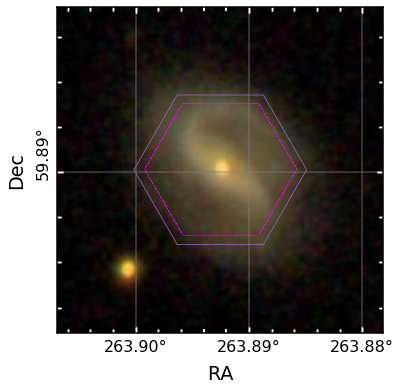

In [50]:
def set_up_axes(ax, color_grid='white', color_tick='white'):
    # extract the coordinates from the axes object
    ra = ax.coords['ra']
    dec = ax.coords['dec']
    # add axis labels
    ra.set_axislabel('RA')
    dec.set_axislabel('Dec')
    # rotate tick labels on dec
    dec.ticklabels.set_rotation(90)
    # add a coordinate grid to the image
    ax.coords.grid(color=color_grid, alpha=0.5, linestyle='solid', lw=1.5)
    for coord in [ra, dec]:
        # set the tick formats
        coord.set_major_formatter('d.dd')
        coord.set_ticks(color=color_tick)
        coord.display_minor_ticks(True)

fig = plt.figure(1)
ax = fig.add_subplot(111, projection=data.wcs)
set_up_axes(ax, color_grid='C7')
#Invert y (Dec) axis
#ax.set_ylim(ax.get_ylim()[::-1])
ax.add_patch(data.get_hexagon(correct_hex=True, edgecolor='C4'))
ax.imshow(data.image)

## Plotting the various masks

Next we can plot the center, star, bar, and sprial arm masks.  These masks are the same size as the image in HDU 0 (525x525).

Before plotting these maps we will create some helper functions the plot each of the masks as alpha-overlays on each other, and the color maps to go along with them.  

This is all code from Coleman Krawcyzk. 

In [8]:
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import numpy as np
import astropy.wcs as wcs

def alpha_overlay(C_a, a_a, C_b, a_b=None):
    # Take a base color (C_a), an alpha map (a_a), and a backgroud image (C_b)
    # and overlay them.
    if a_b is None:
        a_b = np.ones(a_a.shape)
    c_a = np.array([a_a.T] * 3).T * C_a
    c_b = np.array([a_b.T] * 3).T * C_b
    c_out = c_a + ((1 - a_a.T) * c_b.T).T
    return c_out


def alpha_maps(maps, colors=None, vmin=0, vmax=15):
    # Take a list of color masks and base color values
    # and make an alpha-mask overlay image.
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax, clip=True)
    iter_cycle = iter(mpl.rcParams['axes.prop_cycle'])
    for mdx, m in enumerate(maps):
        if colors is None:
            c = next(iter_cycle)['color']
        else:
            c = colors[mdx]
        base_color = np.array(mpl.colors.to_rgb(c))
        norm_map = norm(m)
        if mdx == 0:
            background_color = np.ones(3)
        background_color = alpha_overlay(base_color, norm_map, background_color)
    return background_color


def make_alpha_bar(color, vmin=-1, vmax=15):
    # make a matplotlib color bar for a alpha maks of a single color
    # vmin of -1 to make lables line up correctly
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax, clip=True)
    a_a = norm(range(vmin, vmax))
    C_a = np.array(mpl.colors.to_rgb(color))
    new_cm = alpha_overlay(C_a, a_a, np.ones(3))
    return mpl.colors.ListedColormap(new_cm), norm


def make_alpha_color(count, color, vmin=1, vmax=15):
    # get the alpha-color for a given value
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax, clip=True)
    return mpl.colors.to_rgb(color) + (norm(count), )


def plot_alpha_bar(color, grid, ticks=[]):
    # plot the alpha color bar
    bar, norm = make_alpha_bar(color)
    ax_bar = plt.subplot(grid)
    cb = mpl.colorbar.ColorbarBase(ax_bar, cmap=bar, norm=norm, orientation='vertical', ticks=ticks)
    cb.outline.set_linewidth(0)
    return ax_bar, cb


def zero_theta_line(gz3d):
    phi = gz3d.maps.nsa['elpetro_phi']
    map_wcs = wcs.WCS(gz3d.maps['spx_ellcoo_elliptical_azimuth'].header, naxis=2)
    # get the center of the image
    # cx, cy = map_wcs.wcs_world2pix(ra, dec, 0)
    r_map = gz3d.maps['spx_ellcoo_elliptical_radius'].value
    cy, cx = map(np.mean, np.nonzero(np.isclose(r_map, 0, atol=1)))
    # get the max radius
    r = np.sqrt(cx**2 + cy**2)
    # get the end of the line
    x = r * np.sin(np.deg2rad(-phi)) + cx
    y = r * np.cos(np.deg2rad(-phi)) + cy
    # world coords
    ra_line, dec_line = map_wcs.wcs_pix2world([cx, x], [cy, y], 0)
    # image coords
    return gz3d.wcs.wcs_world2pix(ra_line, dec_line, 0)

With these helper function we can now plot the masks.  To align everthing nicely Coleman set this up to use `gridspec` for the subplots.

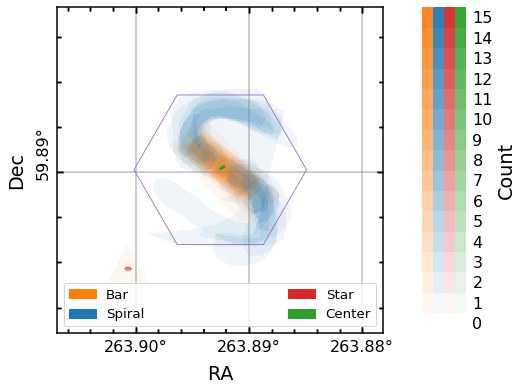

In [9]:
fig = plt.figure(2)

# make the subplot grids
gs = gridspec.GridSpec(1, 2, width_ratios=[0.9, 0.1], wspace=0.01)
gs_color_bars = gridspec.GridSpecFromSubplotSpec(1, 4, wspace=0, subplot_spec=gs[1])

# make the alpha overlay image
maps = [data.bar_mask, data.spiral_mask, data.star_mask, data.center_mask]
colors=['C1', 'C0', 'C3', 'C2']
all_mask = alpha_maps(maps, colors)

# plot the overlay image
ax1 = plt.subplot(gs[0], projection=data.wcs)
set_up_axes(ax1, color_grid='C7', color_tick='black')
ax1.imshow(all_mask)

# plot hexagons for reference
#ax1.add_patch(data.get_hexagon())
ax1.add_patch(data.get_hexagon(correct_hex=True, edgecolor='C4'))

# plot center and star ellipses (to better define the ellipse shape)
center_ellip = data.get_center_ellipse_list()
for e, count in zip(center_ellip, data.center_clusters['count']):
    e.set_edgecolor(make_alpha_color(count, 'C2'))
    ax1.add_artist(e)
star_ellip = data.get_star_ellipse_list()
for e, count in zip(star_ellip, data.star_clusters['count']):
    e.set_edgecolor(make_alpha_color(count, 'C3'))
    ax1.add_artist(e)

# plot theta=0 line
#x_theta, y_theta = zero_theta_line(data)
#ax1.plot(x_theta, y_theta, 'C5')
#ax1.annotate(r'$\theta$', xy=(0.2, 0.8), xytext=(0.05, 0.9), arrowprops={'arrowstyle': '->', 'connectionstyle': 'angle3'}, xycoords='axes fraction', textcoords='axes fraction')

# make a legend
bar_patch = mpl.patches.Patch(color=colors[0], label='Bar')
spiral_patch = mpl.patches.Patch(color=colors[1], label='Spiral')
star_patch = mpl.patches.Patch(color=colors[2], label='Star')
center_patch = mpl.patches.Patch(color=colors[3], label='Center')
plt.legend(handles=[bar_patch, spiral_patch, star_patch, center_patch], ncol=2, loc='lower center', mode='expand')

# make colorbars
ax_bar, cb_bar = plot_alpha_bar(colors[0], gs_color_bars[0])
ax_spiral, cb_spiral = plot_alpha_bar(colors[1], gs_color_bars[1])
ax_star, cb_star = plot_alpha_bar(colors[2], gs_color_bars[2])
ax_center, cb_center = plot_alpha_bar(colors[3], gs_color_bars[3])
ax_center.tick_params(axis=u'both', which=u'both', length=0)
tick_labels = np.arange(0, 16)
tick_locs = tick_labels - 0.5
cb_center.set_ticks(tick_locs)
cb_center.set_ticklabels(tick_labels)
cb_center.set_label('Count')

## Use the maps to plot spaxel map properties as function of r and theta

These masks can be used to pull out spectral line information as function of r and theta for each of the identified features. Coleman Krawcyzk provided the code to do this. 

For these plots we will also color code the spaxel data with the correct alpha-color from the masks.  The helper function `plot_alpha_scatter` does this.

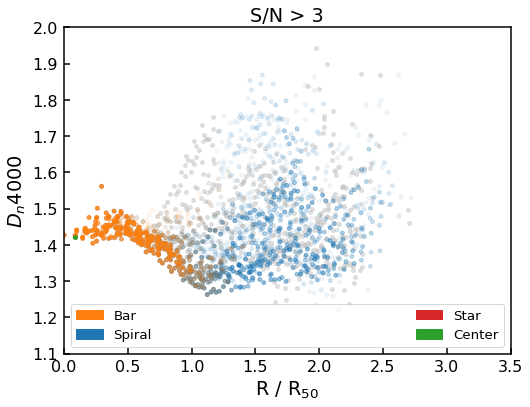

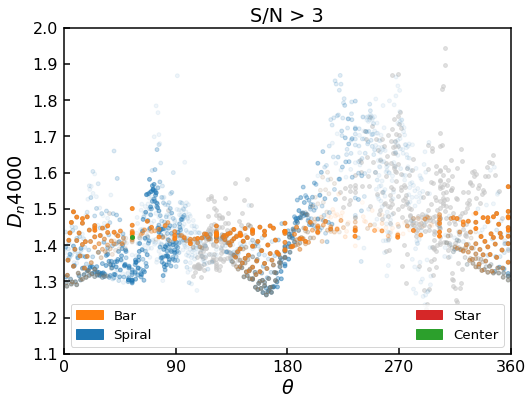

In [16]:
def plot_alpha_scatter(x, y, mask, color, ax, snr=None, sf_mask=None, value=True, **kwargs):
    idx = mask > 0
    if value:
        idx = idx & (y.value > 0)
    if (value) and (snr is not None):
        idx = idx & (y.snr > snr)
    if sf_mask is not None:
        idx = idx & sf_mask
    c = mpl.colors.to_rgb(color)
    c_a = np.array([c + (i, ) for i in mask[idx] / 15])
    c_a[c_a > 1] = 1
    if value:
        return ax.scatter(x[idx], y.value[idx], c=c_a, edgecolor=c_a, **kwargs)
    else:
        return ax.scatter(x[idx], y[idx], c=c_a, edgecolor=c_a, **kwargs)

# the radius plot for D_n4000
fig3 = plt.figure(3)
ax3 = plt.gca()
snr = 3
s = 15
r = data.maps['spx_ellcoo_elliptical_radius'].value
r_50 = data.maps.nsa['elpetro_th50_r']
r_plot = r / r_50
line = data.maps['specindex_dn4000']
# mask of spaxels not in a user drawn map
odx = (data.other_mask_spaxel > 0) & (line.value > 0) & (line.snr > snr)
ax3.scatter(r_plot[odx], line.value[odx], c='#c5c5c5', edgecolor='#c5c5c5', s=s, alpha=0.5)
plot_alpha_scatter(r_plot, line, data.spiral_mask_spaxel, 'C0', ax3, s=s, snr=snr)
plot_alpha_scatter(r_plot, line, data.bar_mask_spaxel, 'C1', ax3, s=s, snr=snr)
plot_alpha_scatter(r_plot, line, data.star_mask_spaxel, 'C3', ax3, s=s, snr=snr)
plot_alpha_scatter(r_plot, line, data.center_mask_spaxel, 'C2', ax3, s=s, snr=snr)
ax3.set_title('S/N > {0}'.format(snr))
ax3.set_ylabel(r'$D_{n}4000$')
ax3.set_xlabel(r'R / R$_{50}$')
ax3.set_ylim(1.1, 2.0)
ax3.set_xlim(0, 3.5)
ax3.legend(handles=[bar_patch, spiral_patch, star_patch, center_patch], ncol=2, loc='lower center', mode='expand')




# the theta plot for D_n4000
fig4 = plt.figure(4)
ax4 = plt.gca()
theta = data.maps['spx_ellcoo_elliptical_azimuth'].value
ax4.scatter(theta[odx], line.value[odx], c='#c5c5c5', edgecolor='#c5c5c5', s=s, alpha=0.5)
plot_alpha_scatter(theta, line, data.spiral_mask_spaxel, 'C0', ax4, s=s, snr=snr)
plot_alpha_scatter(theta, line, data.bar_mask_spaxel, 'C1', ax4, s=s, snr=snr)
plot_alpha_scatter(theta, line, data.star_mask_spaxel, 'C3', ax4, s=s, snr=snr)
plot_alpha_scatter(theta, line, data.center_mask_spaxel, 'C2', ax4, s=s, snr=snr)
ax4.set_xticks([0, 90, 180, 270, 360])
ax4.set_title('S/N > {0}'.format(snr))
ax4.set_ylabel(r'$D_{n}4000$')
ax4.set_xlabel(r'$\theta$')
ax4.set_ylim(1.1, 2.0)
ax4.set_xlim(0, 360)
ax4.legend(handles=[bar_patch, spiral_patch, star_patch, center_patch], ncol=2, loc='lower center', mode='expand')


Or perhaps you prefer to look at the H$\alpha$ emission line flux

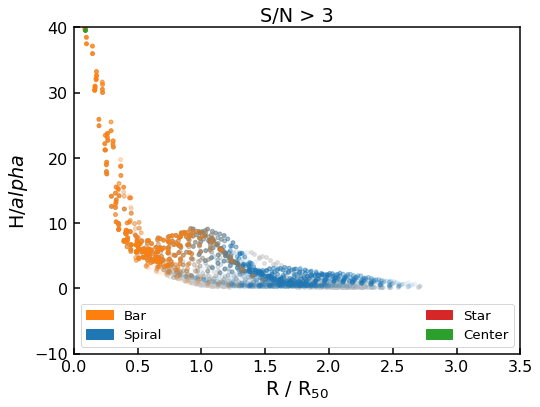

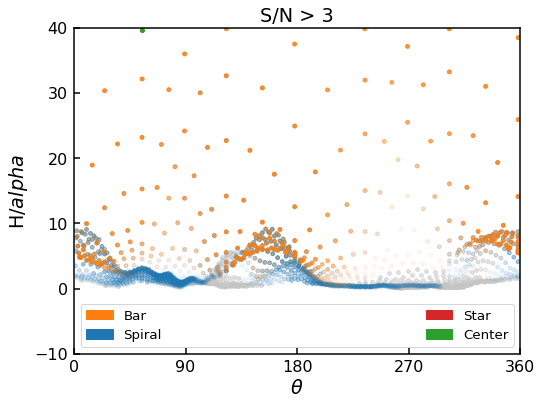

In [20]:
# the radius plot for Halpha
fig3 = plt.figure(3)
ax3 = plt.gca()
snr = 3
s = 15
r = data.maps['spx_ellcoo_elliptical_radius'].value
r_50 = data.maps.nsa['elpetro_th50_r']
r_plot = r / r_50
line = data.maps['emline_gflux_ha_6564']
# mask of spaxels not in a user drawn map
odx = (data.other_mask_spaxel > 0) & (line.value > 0) & (line.snr > snr)
ax3.scatter(r_plot[odx], line.value[odx], c='#c5c5c5', edgecolor='#c5c5c5', s=s, alpha=0.5)
plot_alpha_scatter(r_plot, line, data.spiral_mask_spaxel, 'C0', ax3, s=s, snr=snr)
plot_alpha_scatter(r_plot, line, data.bar_mask_spaxel, 'C1', ax3, s=s, snr=snr)
plot_alpha_scatter(r_plot, line, data.star_mask_spaxel, 'C3', ax3, s=s, snr=snr)
plot_alpha_scatter(r_plot, line, data.center_mask_spaxel, 'C2', ax3, s=s, snr=snr)
ax3.set_title('S/N > {0}'.format(snr))
ax3.set_ylabel(r'H$/alpha$')
ax3.set_xlabel(r'R / R$_{50}$')
ax3.set_ylim(-10,40)
ax3.set_xlim(0, 3.5)
ax3.legend(handles=[bar_patch, spiral_patch, star_patch, center_patch], ncol=2, loc='lower center', mode='expand')




# the theta plot for D_n4000
fig4 = plt.figure(4)
ax4 = plt.gca()
theta = data.maps['spx_ellcoo_elliptical_azimuth'].value
ax4.scatter(theta[odx], line.value[odx], c='#c5c5c5', edgecolor='#c5c5c5', s=s, alpha=0.5)
plot_alpha_scatter(theta, line, data.spiral_mask_spaxel, 'C0', ax4, s=s, snr=snr)
plot_alpha_scatter(theta, line, data.bar_mask_spaxel, 'C1', ax4, s=s, snr=snr)
plot_alpha_scatter(theta, line, data.star_mask_spaxel, 'C3', ax4, s=s, snr=snr)
plot_alpha_scatter(theta, line, data.center_mask_spaxel, 'C2', ax4, s=s, snr=snr)
ax4.set_xticks([0, 90, 180, 270, 360])
ax4.set_title('S/N > {0}'.format(snr))
ax4.set_ylabel(r'H$/alpha$')
ax4.set_xlabel(r'$\theta$')
ax4.set_ylim(-10,40)
ax4.set_xlim(0, 360)
ax4.legend(handles=[bar_patch, spiral_patch, star_patch, center_patch], ncol=2, loc='lower center', mode='expand')


## Average and difference spectra

Coleman also provided code to make the average spectra for all spaxels within each mask using the `get_mean_spectra` method, or the difference between spectra. This functionality which would allow you to use whatever spectral fitting code or other spectral analysis you like in mask regions, currently needs an upgrade due to some changed functionality in `Marvin`, but will be available again soon. 

## BPT diagrams

Thanks to the `Marvin` functionality for BPT plots, We can also make BPT diagrams color coded by mask type. The `get_bpt` method is used to create the various BPT maps with a `snr_min` value (3 by default, see first cell).

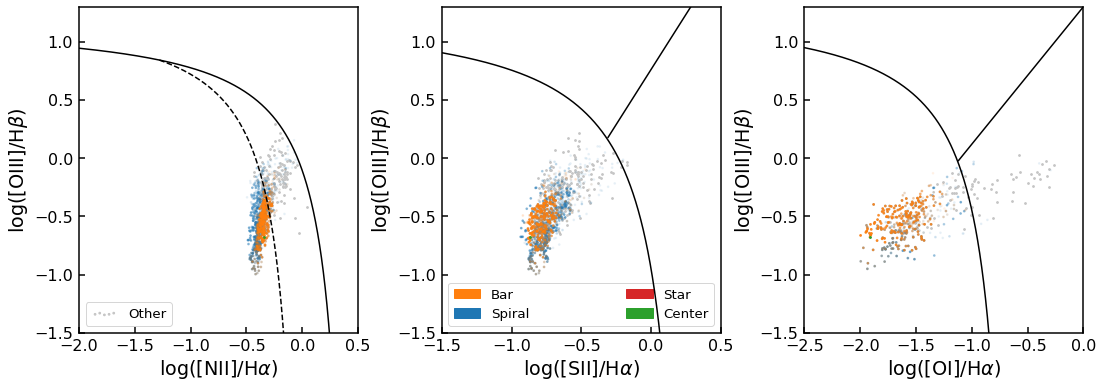

In [18]:
import marvin.utils.dap.bpt as bpt


def plot_bpt_boundry(axs):
    # Plots the classification boundary lines
    xx_sf_nii = np.linspace(-1.281, 0.045, int(1e4))
    xx_sf_sii = np.linspace(-2, 0.315, int(1e4))
    xx_sf_oi = np.linspace(-2.5, -0.7, int(1e4))
    xx_comp_nii = np.linspace(-2, 0.4, int(1e4))
    xx_agn_sii = np.array([-0.308, 1.0])
    xx_agn_oi = np.array([-1.12, 0.5])
    # xlims = [ax.get_xlim() for ax in axs]
    # ylims = [ax.get_ylim() for ax in axs]
    xlims = [(-2, 0.5), (-1.5, 0.5), (-2.5, 0.0)]
    ylims = [(-1.5, 1.3), (-1.5, 1.3), (-1.5, 1.3)]
    xlabels = [r'log([NII]/H$\alpha$)', r'log([SII]/H$\alpha$)', r'log([OI]/H$\alpha$)']
    axs[0].plot(xx_sf_nii, bpt.kewley_sf_nii(xx_sf_nii), 'k--', zorder=90)
    axs[0].plot(xx_comp_nii, bpt.kewley_comp_nii(xx_comp_nii), 'k-', zorder=90)
    axs[1].plot(xx_sf_sii, bpt.kewley_sf_sii(xx_sf_sii), 'k-', zorder=90)
    axs[1].plot(xx_agn_sii, bpt.kewley_agn_sii(xx_agn_sii), 'k-', zorder=80)
    axs[2].plot(xx_sf_oi, bpt.kewley_sf_oi(xx_sf_oi), 'k-', zorder=90)
    axs[2].plot(xx_agn_oi, bpt.kewley_agn_oi(xx_agn_oi), 'k-', zorder=80)
    for ax, xlim, ylim, xlabel in zip(axs, xlims, ylims, xlabels):
        ax.set_ylabel(r'log([OIII]/H$\beta$)')
        ax.set_xlabel(xlabel)
        ax.set_xlim(*xlim)
        ax.set_ylim(*ylim)
    axs[0].legend(loc=3)

    
def plot_bpt_alpha(gz3d, ax, bpt_kind, **kwargs):
    y = gz3d.log_oiii_hb
    x = getattr(gz3d, bpt_kind)
    mdx = ~(y.mask | x.mask)
    s = kwargs.pop('s', 8)
    odx = mdx & (gz3d.other_mask_spaxel > 0)
    ax.scatter(x[odx], y[odx], c='#c5c5c5', edgecolor='#c5c5c5', s=s, label='Other', **kwargs)
    plot_alpha_scatter(x, y, gz3d.spiral_mask_spaxel, 'C0', ax, s=s, sf_mask=mdx, snr=None, value=False, **kwargs)
    plot_alpha_scatter(x, y, gz3d.bar_mask_spaxel, 'C1', ax, s=s, sf_mask=mdx, snr=None, value=False, **kwargs)
    plot_alpha_scatter(x, y, gz3d.star_mask_spaxel, 'C3', ax, s=s, sf_mask=mdx, snr=None, value=False, **kwargs)
    plot_alpha_scatter(x, y, gz3d.center_mask_spaxel, 'C2', ax, s=s, sf_mask=mdx, snr=None, value=False, **kwargs)


fig7 = plt.figure(7, figsize=(18, 6))
gs = gridspec.GridSpec(1, 3, wspace=0.3)
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax1.legend(handles=[bar_patch, spiral_patch, star_patch, center_patch], ncol=2, loc='lower center', mode='expand')
ax2 = plt.subplot(gs[2])
plot_bpt_alpha(data, ax0, 'log_nii_ha', s=3)
plot_bpt_alpha(data, ax1, 'log_sii_ha', s=3)
plot_bpt_alpha(data, ax2, 'log_oi_ha', s=3)
plot_bpt_boundry([ax0, ax1, ax2])

## Making Masked Images

Finally, you might like to make some nice images using the masks to illustrate the structures you see. 

We'll start with the basic `Marvin` images/maps: 

SDSS_ACCESS> Done!


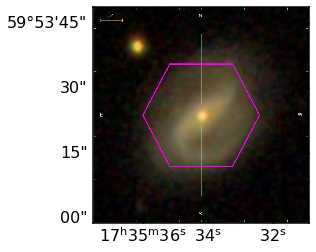

In [21]:
from marvin.tools.image import Image

image = Image(plateifu='8624-9102')
ax = image.plot(dpi=200)

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb625eea0f0>)

/packages/python3.6.8/lib/python3.6/site-packages/matplotlib/image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
<string>:6: UserWarning: Warning: converting a masked element to nan.
/packages/python3.6.8/lib/python3.6/site-packages/numpy-1.18.1-py3.6-linux-x86_64.egg/numpy/ma/core.py:722: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


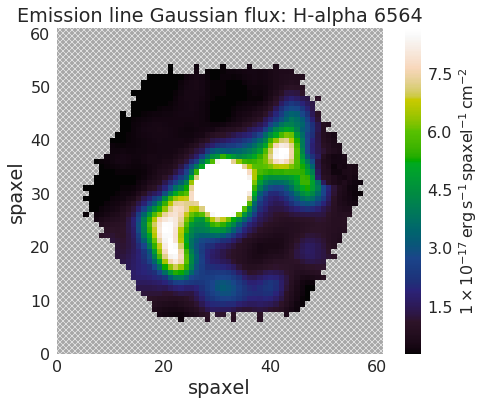

In [22]:
from marvin.tools.maps import Maps

maps = Maps('8624-9102')
ha = maps.emline_gflux_ha_6564
ha.plot()

Now we use a helper function from `gz3d_fits` code by Coleman to grab the masks on the same gridding as the H$\alpha$ maps. 

In [24]:
#access masks from Coleman's code but use grid the size of the map
data.make_all_spaxel_masks(grid_size = ha.shape)

Define a bar mask which also uses the H$\alpha$ data mask and plot only the data in the mask. 

The threshold you pick for the mask is arbitrary, and depends on your goal. All images are assessed by 15 users, so $N=7$ represents roughly half of all users.  

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb7744680f0>)

/packages/python3.6.8/lib/python3.6/site-packages/matplotlib/image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
<string>:6: UserWarning: Warning: converting a masked element to nan.
/packages/python3.6.8/lib/python3.6/site-packages/numpy-1.18.1-py3.6-linux-x86_64.egg/numpy/ma/core.py:722: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


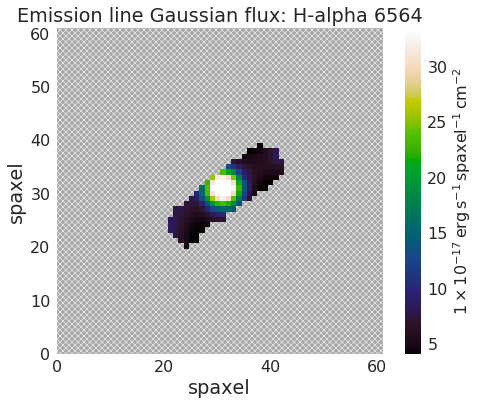

In [33]:
barthreshold = data.bar_mask_spaxel > 7
bar_mask = ha.mask | ~barthreshold
ha.plot(mask=bar_mask)

Or if you prefer only the data outside the mask

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb7743b6160>)

/packages/python3.6.8/lib/python3.6/site-packages/matplotlib/image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
<string>:6: UserWarning: Warning: converting a masked element to nan.
/packages/python3.6.8/lib/python3.6/site-packages/numpy-1.18.1-py3.6-linux-x86_64.egg/numpy/ma/core.py:722: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


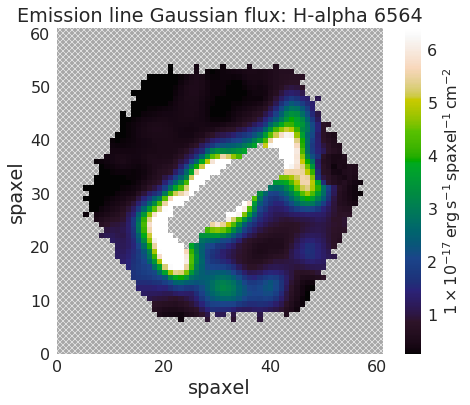

In [34]:
bar_mask = ha.mask | barthreshold
ha.plot(mask=bar_mask)

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb625d70748>)

/packages/python3.6.8/lib/python3.6/site-packages/matplotlib/image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
<string>:6: UserWarning: Warning: converting a masked element to nan.
/packages/python3.6.8/lib/python3.6/site-packages/numpy-1.18.1-py3.6-linux-x86_64.egg/numpy/ma/core.py:722: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


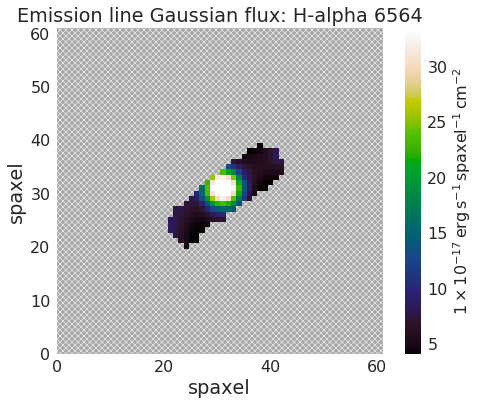

## Spiral arms

We'll define a spiral as anywhere with $N_{\rm spiral}>5$ and $N_{\rm spiral}>N_{\rm bar}$

(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb774269e10>)

/packages/python3.6.8/lib/python3.6/site-packages/matplotlib/image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
<string>:6: UserWarning: Warning: converting a masked element to nan.
/packages/python3.6.8/lib/python3.6/site-packages/numpy-1.18.1-py3.6-linux-x86_64.egg/numpy/ma/core.py:722: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


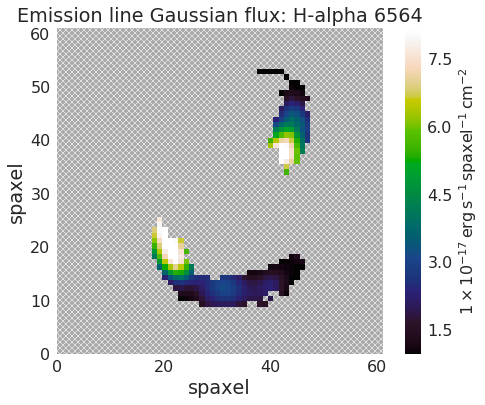

In [45]:
spiral_threshold=data.spiral_mask_spaxel > 5
bars = data.spiral_mask_spaxel < data.bar_mask_spaxel 
spiralnotbar = spiral_threshold & ~bars
spiral_mask = ha.mask | ~spiralnotbar

ha.plot(mask=spiral_mask)